In [13]:
import os
import glob
import h5py
import fitsio
import numpy as np 

from astropy.table import Table

# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [14]:
# read VI table
fvi = os.path.join('/global/cfs/cdirs/desi/sv/vi/TruthTables/', 'truth_table_BGS_full_66003.txt')#'truth_table_BGS_v1.1.csv')

zrr_vi, ztrue, qa_flag, dchi2_vi, zwarn_vi, rflux_vi, vi_ra, vi_dec = np.genfromtxt(fvi, delimiter=',', skip_header=1, unpack=True, usecols=[2, 4, 6, 11, 12, 16, -2, -1])# usecols=[0, 1, 2, 3, 10, 11, 15])

fvi = os.path.join('/global/cfs/cdirs/desi/sv/vi/TruthTables/', 'truth_table_BGS_v1.1.csv')
vi_id = Table.read(fvi, format='ascii.csv',include_names=['TARGETID'])['TARGETID']
vi_id = np.array(vi_id).astype(int)

coadd_ra, coadd_dec, coadd_targetids = [], [], [] 
for petal in range(10): 
    petal_coadd = fitsio.read('/global/cfs/cdirs/desi/spectro/redux/andes/tiles/66003/20200315/spectra-%i-66003-20200315.fits' % petal)
    
    coadd_ra.append(petal_coadd['TARGET_RA'])
    coadd_dec.append(petal_coadd['TARGET_DEC'])
    coadd_targetids.append(petal_coadd['TARGETID'])
    
coadd_ra = np.concatenate(coadd_ra)
coadd_dec = np.concatenate(coadd_dec)
coadd_targetids = np.concatenate(coadd_targetids)

_, mvi, mca = np.intersect1d(vi_id, coadd_targetids, return_indices=True)
print(len(mvi))

2241


Text(0,0.5,'Dec')

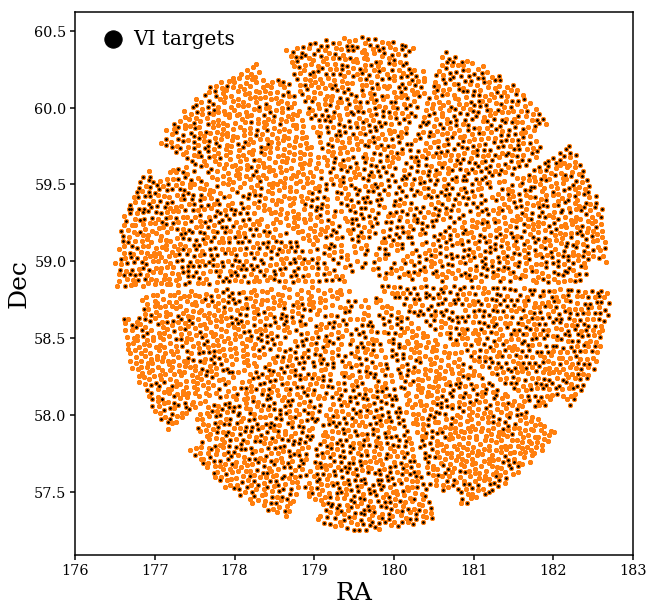

In [15]:
fig = plt.figure(figsize=(10,10))
sub = fig.add_subplot(111)
sub.scatter(coadd_ra, coadd_dec, c='C1', s=15)
sub.scatter(vi_ra, vi_dec, c='k', s=3, label='VI targets')
sub.legend(loc='upper left', fontsize=20, handletextpad=0., markerscale=10)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(176, 183)
sub.set_ylabel('Dec', fontsize=25)